In [4]:
from ecmwfapi import ECMWFDataServer

In [1]:
target = "fire.nc"
print target

fire.nc


I get the data

In [9]:
server = ECMWFDataServer(url = "https://api.ecmwf.int/v1",
                key   = "XXXXXXXXXXXXXXXX",
                email =  "Sylvie.Lamy-Thepaut@ecmwf.int")      

request = {
    "dataset": "geff_reanalysis",
    "date": "2016-12-01/to/2016-12-31",
    "origin": "fwis",
    "param": "fwi",
    "step": "00",
    "time": "0000",
    "type": "an",
    "target": target,
        }

   
server.retrieve(request)

print "Data are downloaded"

2017-02-27 16:57:07 ECMWF API python library 1.4.1
2017-02-27 16:57:07 ECMWF API at https://api.ecmwf.int/v1
2017-02-27 16:57:07 Welcome Sylvie Lamy-Thepaut
2017-02-27 16:57:07 In case of problems, please check https://software.ecmwf.int/wiki/display/WEBAPI/Troubleshooting or contact calldesk@ecmwf.int
2017-02-27 16:57:07 
2017-02-27 16:57:07 Request submitted
2017-02-27 16:57:07 Request id: 58b45a6374a7fbec2ebc983a
2017-02-27 16:57:07 Request is queued
2017-02-27 17:34:46 Request is active
Calling '['tar', '-cf', '/data/data01/scratch/get-files-atls19-95e2cf679cd58ee9b4db4dd119a05a8d-8mhWsc.tar', '-C', '/data/data01/scratch', 'geff_reanalysis_an_fwis_fwi_20161201_0000_00.nc.gz', '-C', '/data/data01/scratch', 'geff_reanalysis_an_fwis_fwi_20161202_0000_00.nc.gz', '-C', '/data/data01/scratch', 'geff_reanalysis_an_fwis_fwi_20161203_0000_00.nc.gz', '-C', '/data/data01/scratch', 'geff_reanalysis_an_fwis_fwi_20161204_0000_00.nc.gz', '-C', '/data/data01/scratch', 'geff_reanalysis_an_fwis_fwi_

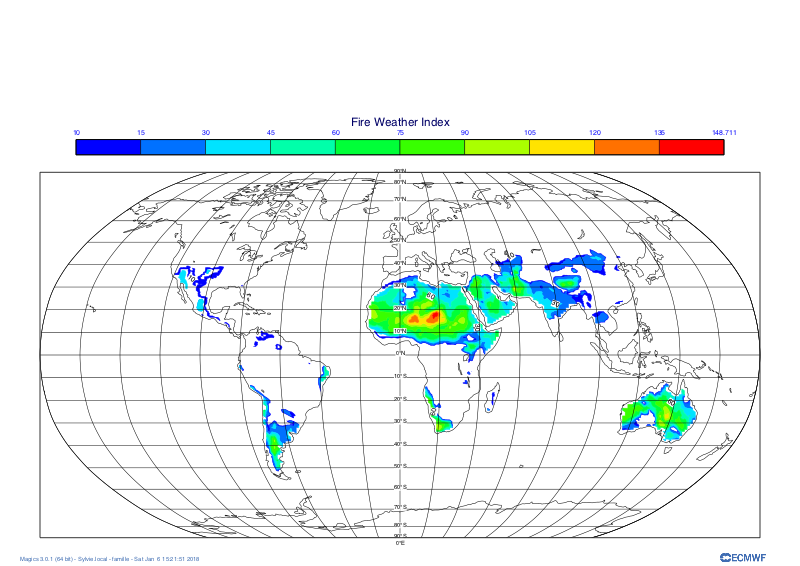

In [26]:
import Magics.macro as magics
#Setting the coordinates of the geographical area
projection = magics.mmap(subpage_map_projection = 'robinson',
                        )

netcdf = magics.mnetcdf(netcdf_filename='geff_reanalysis_an_fwis_fwi_20161214_0000_00.nc', 
                        netcdf_value_variable = 'fwi')

contour = magics.mcont(
    contour_shade='on',
    contour_shade_method = 'area_fill',
    contour_shade_colour_direction = "clockwise",
    contour_shade_colour_method  =   "calculate",
    contour_shade_max_level_colour=  "red",
    contour_shade_min_level_colour= "blue",
    legend="on",
    contour='off',
    contour_min_level=10.
)

title = magics.mtext(text_lines=["<netcdf_info variable='fwi' attribute='title'/>"])
legend = magics.mlegend( legend_display_type = "continuous")

magics.plot(projection, netcdf, contour, title, magics.mcoast(), legend)